In [1]:
import pandas as pd
import numpy as np
import os
import explore_r as ex
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["font.size"] = 10
from sklearn.model_selection import train_test_split
import scipy.stats as stats

# READ CSV

In [2]:
df = pd.read_csv('prepped_data.csv')

In [3]:
df.sample(20)
df.drop(columns=['playoffs', 'is_push'], inplace=True)

In [4]:
def split_data(df):
    train_val,test = train_test_split(df,
                                     random_state=123,
                                     train_size=0.82)
    train, validate = train_test_split(train_val,
                                      random_state=123,
                                      train_size=0.73)
    return train, validate, test

In [5]:
train, val, test = split_data(df)

In [6]:
train

,date,day_of_week,start_time,week_num,home_score,home_wins,away_score,away_wins,temp,humidity,wind,spread,ou,is_under,abnormal_start,total_scores,is_playoff,playoff_implications,is_turf,is_outdoor
9405,1985-11-10,Sunday,1,10,23,4,17,1,61,64,16,-8.5,39.5,0,0,40,0,1,1,1
2000,2015-11-22,Sunday,4,11,3,2,33,4,87,12,4,-3.0,45.0,1,0,36,0,1,0,1
4410,2006-10-22,Sunday,1,7,24,1,34,1,86,59,9,-5.5,40.0,0,0,58,0,0,0,1
3252,2010-12-19,Sunday,4,15,18,6,34,11,45,0,2,-6.0,46.5,0,0,52,0,1,1,1
7470,1994-10-02,Sunday,1,5,17,1,15,3,72,0,0,-2.5,38.0,1,0,32,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10533,1980-10-05,Sunday,4,5,48,2,26,3,65,79,7,-9.0,48.0,0,0,74,0,0,0,1
1526,2017-10-22,Sunday,1,7,33,4,0,3,54,0,0,-3.0,45.5,1,0,33,0,0,0,1
3607,2009-11-08,Sunday,4,9,27,3,34,1,63,57,5,-4.0,40.5,0,0,61,0,0,0,1
9119,1986-12-07,Sunday,1,14,17,4,21,9,33,90,16,-3.0,37.0,0,0,38,0,1,1,1


In [7]:
'start_time',	'week_num',	'home_score',	'home_wins',	'away_score',	'away_wins',	'temp',	'humidity',	'wind', 'spread',	'ou',	'is_under',	'is_push',	'abnormal_start',	'playoffs',	'total_scores',	'is_playoff',	'playoff_implications',	'is_turf',	'is_outdoor'

('start_time',
 'week_num',
 'home_score',
 'home_wins',
 'away_score',
 'away_wins',
 'temp',
 'humidity',
 'wind',
 'spread',
 'ou',
 'is_under',
 'is_push',
 'abnormal_start',
 'playoffs',
 'total_scores',
 'is_playoff',
 'playoff_implications',
 'is_turf',
 'is_outdoor')

In [8]:
def pairplot_data(df):
    '''
    the function take a zillow data frame as an argument
    creates a random sample n=100_000 for faster visualiztions
    creates a pairplot with regression line for numeric variables
    '''
    # draw a sample
    #sample = df.sample(100_000, random_state=2912)

    #define columns
    col_pairplot = ['start_time', 'week_num', 'home_score', 'home_wins', 'away_score', 'away_wins',	'temp',	'humidity',	'wind', 'spread', 'ou',	'is_under', 'abnormal_start', 'total_scores', 'is_playoff', 'playoff_implications', 'is_turf', 'is_outdoor']

    # create a pairplot
    sns.pairplot(data=df[col_pairplot], kind='reg', plot_kws={'line_kws':{'color':'red'}}, corner=True)
    plt.show()

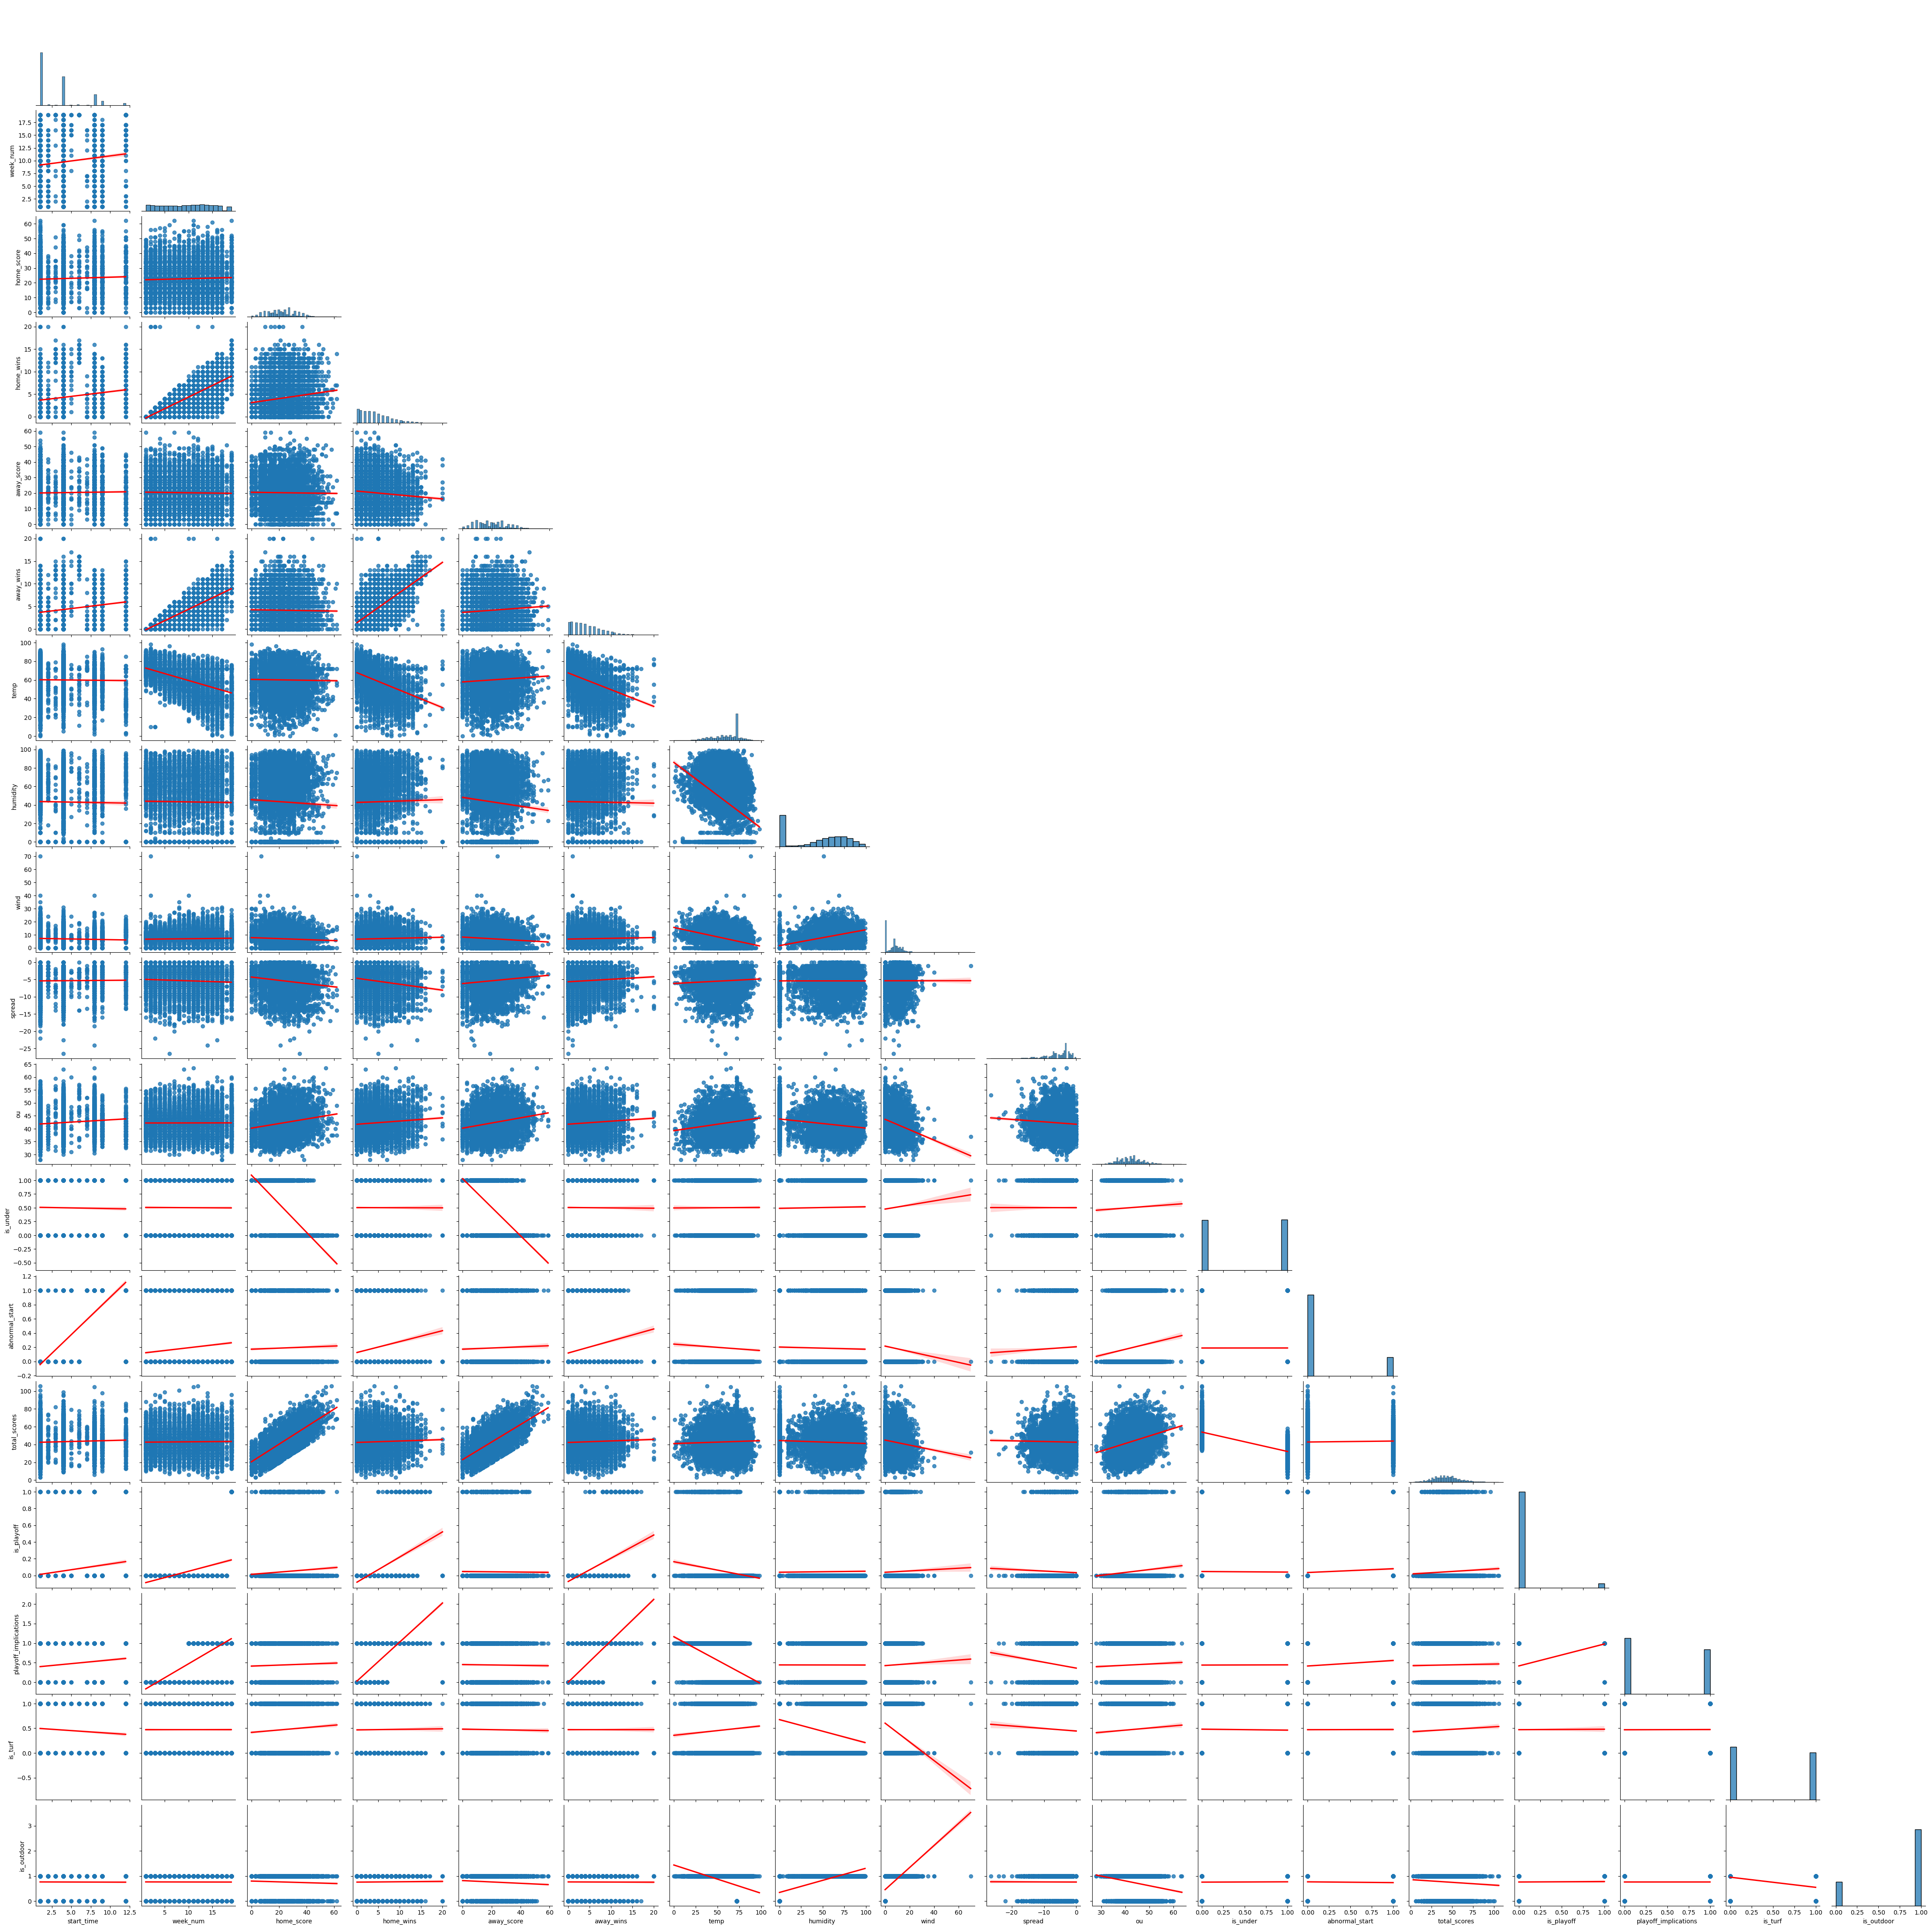

In [9]:
pairplot_data(train)

In [21]:
cat_vars = ['start_time',	'week_num',	'home_score',	'home_wins',	'away_score',	'away_wins',	'temp',	'humidity',	'wind', 'spread',	'ou',	'abnormal_start',	'total_scores',	'is_playoff',	'playoff_implications',	'is_turf',	'is_outdoor']

quant_vars = ['is_under']

In [29]:
def explore_univariate(train, cat_vars, quant_vars):
    for var in cat_vars:
        explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)
        
def explore_bivariate(train, target, cat_vars, quant_vars):
    for cat in cat_vars:
        explore_bivariate_categorical(train, 'Churn_Yes', cat)
    for quant in quant_vars:
        explore_bivariate_quant(train, 'Churn_Yes', quant)

def explore_multivariate(train, target, cat_vars, quant_vars):
    '''
    '''
    plot_swarm_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    violin = plot_violin_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    pair = sns.pairplot(data=train, vars=quant_vars, hue='Churn_Yes')
    plt.show()
    plot_all_continuous_vars(train, 'Churn_Yes', quant_vars)
    plt.show()    

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
### Univariate

def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='lightseagreen')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='lightseagreen')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats
    
def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#### Bivariate

def explore_bivariate_categorical(train, target, cat_var):
    '''
    takes in categorical variable and binary target variable, 
    returns a crosstab of frequencies
    runs a chi-square test for the proportions
    and creates a barplot, adding a horizontal line of the overall rate of the target. 
    '''
    print(cat_var, "\n_____________________\n")
    ct = pd.crosstab(train[cat_var], train[target], margins=True)
    chi2_summary, observed, expected = run_chi2(train, cat_var, target)
    p = plot_cat_by_target(train, target, cat_var)
    
    print(chi2_summary)
    print("\nobserved:\n", ct)
    print("\nexpected:\n", expected)
    plt.show(p)
    print("\n_____________________\n")

def explore_bivariate_quant(train, target, quant_var):
    '''
    descriptive stats by each target class. 
    compare means across 2 target groups 
    boxenplot of target x quant
    swarmplot of target x quant
    '''
    print(quant_var, "\n____________________\n")
    descriptive_stats = train.groupby(target)[quant_var].describe()
    average = train[quant_var].mean()
    mann_whitney = compare_means(train, target, quant_var)
    plt.figure(figsize=(4,4))
    boxen = plot_boxen(train, target, quant_var)
    swarm = plot_swarm(train, target, quant_var)
    plt.show()
    print(descriptive_stats, "\n")
    print("\nMann-Whitney Test:\n", mann_whitney)
    print("\n____________________\n")

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## Bivariate Categorical

def run_chi2(train, cat_var, target):
    observed = pd.crosstab(train[cat_var], train[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

def plot_cat_by_target(train, target, cat_var):
    p = plt.figure(figsize=(2,2))
    p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
    overall_rate = train[target].mean()
    p = plt.axhline(overall_rate, ls='--', color='gray')
    return p
    

## Bivariate Quant

def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

def plot_boxen(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.boxenplot(data=train, x=target, y=quant_var, color='lightseagreen')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

# alt_hyp = ‘two-sided’, ‘less’, ‘greater’

def compare_means(train, target, quant_var, alt_hyp='two-sided'):
    x = train[train[target]==0][quant_var]
    y = train[train[target]==1][quant_var]
    return stats.mannwhitneyu(x, y, use_continuity=True, alternative=alt_hyp)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
### Multivariate

def plot_all_continuous_vars(train, target, quant_vars):
    '''
    Melt the dataset to "long-form" representation
    boxenplot of measurement x value with color representing survived. 
    '''
    my_vars = [item for sublist in [quant_vars, [target]] for item in sublist]
    sns.set(style="whitegrid", palette="muted")
    melt = train[my_vars].melt(id_vars=target, var_name="measurement")
    plt.figure(figsize=(8,6))
    p = sns.boxenplot(x="measurement", y="value", hue=target, data=melt)
    p.set(yscale="log", xlabel='')    
    plt.show()

def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()
    
def plot_swarm_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.swarmplot(x=cat, y=quant, data=train, ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()

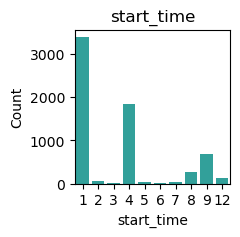

            start_time  Count  Percent
start_time                            
1                    1   3386    52.33
4                    4   1845    28.51
8                    9    689    10.65
9                    8    270     4.17
12                  12    130     2.01
2                    2     56     0.87
6                    5     32     0.49
3                    7     27     0.42
7                    6     21     0.32
5                    3     15     0.23
_________________________________________________________________


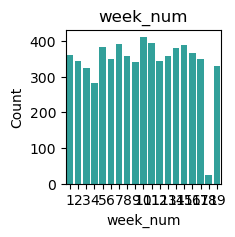

          week_num  Count  Percent
week_num                          
13              10    411     6.35
14              11    394     6.09
11               7    392     6.06
1               15    389     6.01
12               5    382     5.90
16              14    380     5.87
15              16    366     5.66
2                1    361     5.58
9                8    357     5.52
10              13    357     5.52
7                6    348     5.38
3               17    348     5.38
6               12    343     5.30
17               2    343     5.30
5                9    340     5.25
4               19    329     5.08
8                3    323     4.99
19               4    283     4.37
18              18     25     0.39
_________________________________________________________________


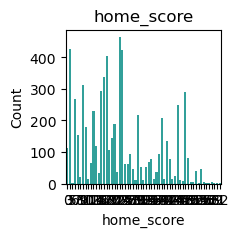

            home_score  Count  Percent
home_score                            
20                  23    465     7.19
17                   3    428     6.61
24                  24    422     6.52
27                  18    404     6.24
31                  17    337     5.21
10                   9    311     4.81
23                  16    292     4.51
13                  48    291     4.50
21                   6    267     4.13
14                  45    248     3.83
16                  13    230     3.55
34                  30    219     3.38
28                  39    209     3.23
30                  21    189     2.92
7                   10    179     2.77
38                   7    154     2.38
26                  20    143     2.21
19                  41    135     2.09
35                  14    119     1.84
3                    0    114     1.76
6                   19    107     1.65
37                  27     95     1.47
22                  38     95     1.47
0                   49   

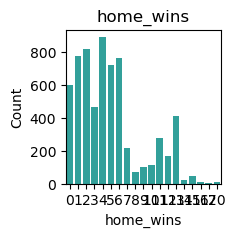

           home_wins  Count  Percent
home_wins                           
0                  4    892    13.78
1                  2    817    12.63
2                  1    773    11.95
3                  6    765    11.82
4                  5    719    11.11
5                  0    598     9.24
6                  3    466     7.20
7                 13    410     6.34
8                 11    279     4.31
9                  7    217     3.35
10                12    165     2.55
11                10    113     1.75
12                 9    100     1.55
13                 8     72     1.11
14                15     47     0.73
15                14     21     0.32
16                16      8     0.12
20                20      7     0.11
17                17      2     0.03
_________________________________________________________________


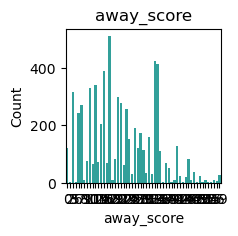

            away_score  Count  Percent
away_score                            
17                  17    510     7.88
10                  33    423     6.54
20                  34    412     6.37
24                  15    387     5.98
14                  12    341     5.27
13                  10    328     5.07
27                   3    316     4.88
21                  20    299     4.62
23                  21    277     4.28
7                    7    269     4.16
31                  23    255     3.94
16                   6    241     3.72
3                   14    203     3.14
28                  26    190     2.94
34                  28    172     2.66
30                  31    158     2.44
6                   24    153     2.36
0                   41    129     1.99
19                  27    121     1.87
9                    0    120     1.85
38                  29    115     1.78
26                  35    111     1.72
37                  45     83     1.28
35                  19   

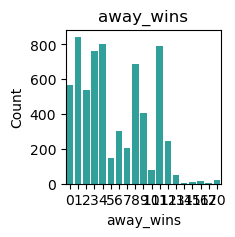

           away_wins  Count  Percent
away_wins                           
1                  1    843    13.03
0                  4    803    12.41
2                 11    791    12.22
3                  3    763    11.79
4                  8    689    10.65
5                  0    567     8.76
6                  2    537     8.30
7                  9    405     6.26
8                  6    303     4.68
9                 12    244     3.77
10                 7    206     3.18
11                 5    145     2.24
12                10     79     1.22
13                13     52     0.80
14                20     18     0.28
15                16     12     0.19
16                15      7     0.11
20                14      6     0.09
17                17      1     0.02
_________________________________________________________________


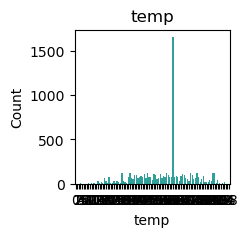

      temp  Count  Percent
temp                      
72      61   1658    25.62
57      87    126     1.95
61      86    123     1.90
58      45    123     1.90
54      72    120     1.85
...    ...    ...      ...
93       1      1     0.02
94      98      1     0.02
7        5      1     0.02
0       96      1     0.02
4        4      1     0.02

[97 rows x 3 columns]
_________________________________________________________________


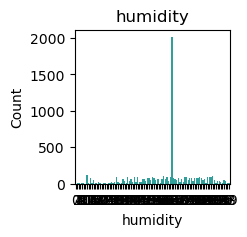

          humidity  Count  Percent
humidity                          
0               64   2014    31.12
74              12    113     1.75
63              59    108     1.67
65               0    107     1.65
60              89    105     1.62
...            ...    ...      ...
24               4      4     0.06
9               11      2     0.03
2               21      1     0.02
4               24      1     0.02
8                8      1     0.02

[95 rows x 3 columns]
_________________________________________________________________


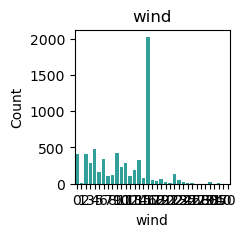

      wind  Count  Percent
wind                      
0       16   2024    31.28
8        4    475     7.34
9        9    418     6.46
10       2    404     6.24
7        0    404     6.24
6        6    345     5.33
12      14    334     5.16
5        3    289     4.47
11      11    288     4.45
13      10    232     3.59
15      13    194     3.00
14       5    166     2.57
4       22    140     2.16
16       8    126     1.95
3        7    113     1.75
17      12    104     1.61
18      15     75     1.16
2       19     67     1.04
20      23     54     0.83
19      17     50     0.77
21      18     36     0.56
1       20     29     0.45
22      24     28     0.43
23      30     20     0.31
24      21     14     0.22
25      35     11     0.17
26      26      9     0.14
27       1      7     0.11
30      25      5     0.08
28      40      3     0.05
40      31      2     0.03
31      27      2     0.03
35      28      1     0.02
70      70      1     0.02
29      29      1     0.02
_

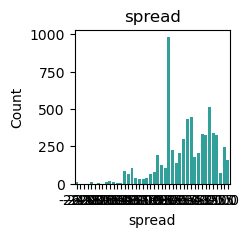

        spread  Count  Percent
spread                        
-3.0      -8.5    982    15.18
-3.5      -3.0    513     7.93
-7.0      -5.5    446     6.89
-2.5      -6.0    435     6.72
-4.0      -2.5    340     5.25
-6.0      -4.0    334     5.16
-6.5      -3.5    329     5.08
-1.0      -2.0    324     5.01
-2.0      -6.5    297     4.59
-5.5      -1.0    244     3.77
-4.5      -8.0    223     3.45
-1.5      -7.0    208     3.21
-7.5      -4.5    203     3.14
-5.0     -10.0    194     3.00
-10.0     -5.0    176     2.72
-9.0       0.0    162     2.50
-9.5      -7.5    142     2.19
-8.0      -9.5    127     1.96
-8.5     -13.5    107     1.65
-10.5     -9.0    105     1.62
 0.0     -14.5     82     1.27
-13.5    -10.5     76     1.17
-13.0     -1.5     69     1.07
-11.0    -11.0     68     1.05
-14.0    -14.0     66     1.02
-12.0    -11.5     40     0.62
-11.5    -13.0     35     0.54
-12.5    -12.5     34     0.53
-14.5    -12.0     32     0.49
-16.0    -16.5     15     0.23
-17.0   

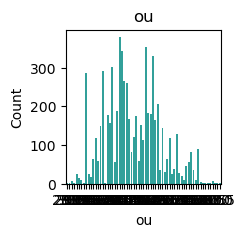

        ou  Count  Percent
ou                        
41.0  39.5    379     5.86
44.0  45.0    354     5.47
43.0  40.0    343     5.30
42.0  46.5    329     5.08
37.0  38.0    302     4.67
...    ...    ...      ...
58.0  29.5      1     0.02
30.5  36.6      1     0.02
29.5  60.0      1     0.02
63.5  63.5      1     0.02
63.0  63.0      1     0.02

[65 rows x 3 columns]
_________________________________________________________________


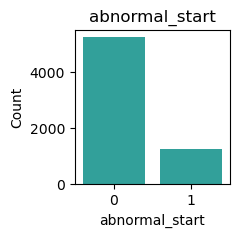

                abnormal_start  Count  Percent
abnormal_start                                
0                            0   5250    81.13
1                            1   1221    18.87
_________________________________________________________________


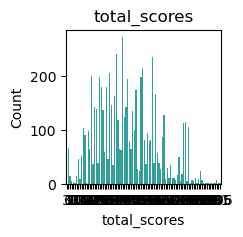

              total_scores  Count  Percent
total_scores                              
37                      40    273     4.22
51                      36    242     3.74
41                      58    236     3.65
44                      52    215     3.32
47                      32    205     3.17
...                    ...    ...      ...
93                      81      1     0.02
95                      98      1     0.02
94                      90      1     0.02
106                     11      1     0.02
99                      99      1     0.02

[94 rows x 3 columns]
_________________________________________________________________


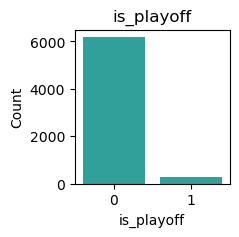

            is_playoff  Count  Percent
is_playoff                            
0                    0   6188    95.63
1                    1    283     4.37
_________________________________________________________________


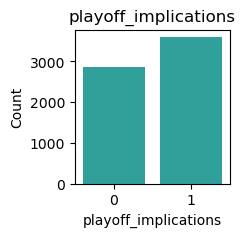

                      playoff_implications  Count  Percent
playoff_implications                                      
0                                        1   3604    55.69
1                                        0   2867    44.31
_________________________________________________________________


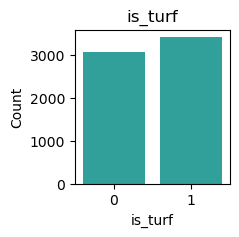

         is_turf  Count  Percent
is_turf                         
0              1   3417     52.8
1              0   3054     47.2
_________________________________________________________________


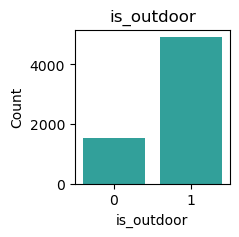

            is_outdoor  Count  Percent
is_outdoor                            
1                    1   4926    76.12
0                    0   1545    23.88
_________________________________________________________________


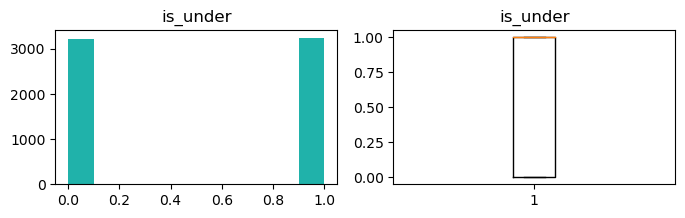

count    6471.000000
mean        0.502395
std         0.500033
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: is_under, dtype: float64


In [26]:
explore_univariate(train, cat_vars, quant_vars)